In [54]:
import geopandas as gpd

In [82]:
df = gpd.read_file("nhgis0009_shapefile_tl2018_us_cd116th_2018/US_cd116th_2018.shp")
#df = df.to_crs("EPSG:4326")

In [56]:
df.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

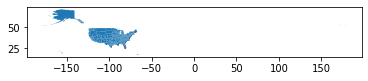

In [57]:
df.plot()

In [65]:
for i,r in df.iterrows():
    d = gpd.GeoDataFrame(r).T

    d.simplify(.001).to_file(f'geojsons/{d.GISJOIN.iloc[0]}.geojson', driver='GeoJSON')

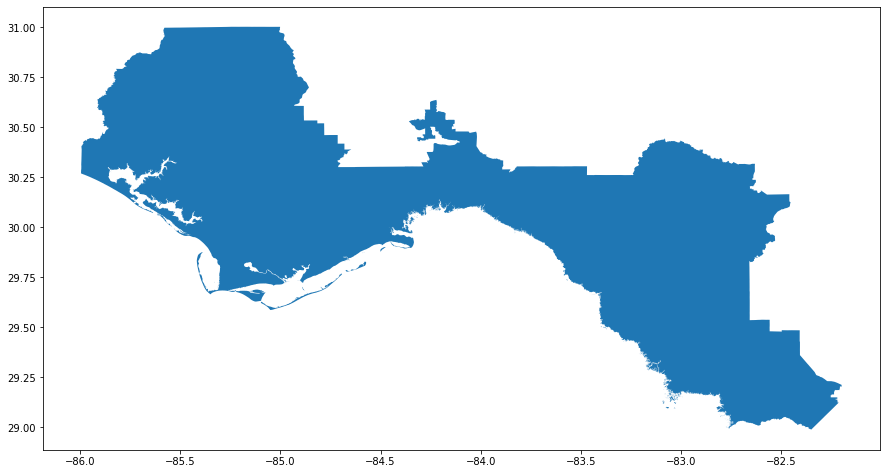

In [59]:

d.plot(figsize=(15,15))

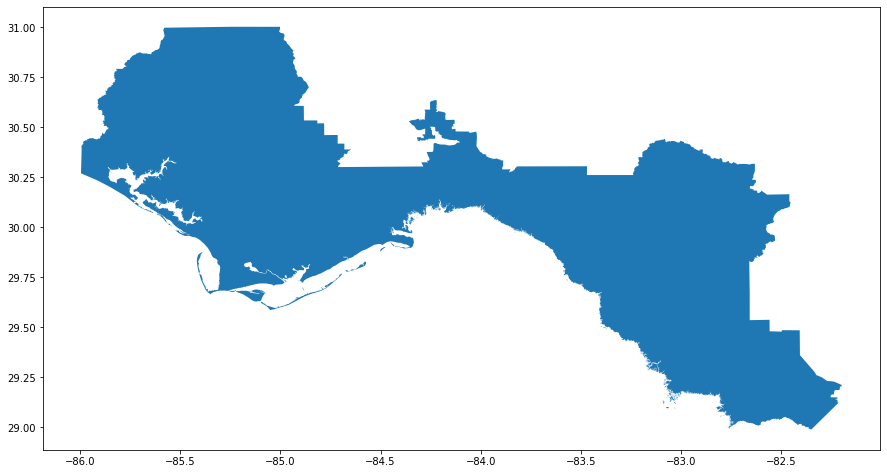

In [64]:
d2 = d.simplify(.001)
d2.plot(figsize=(15,15))

In [43]:
d.GEOID.iloc[0]

'7298'

In [21]:
d2.to_file('geojsons/test.geojson', driver='GeoJSON')

In [ ]:
d.T

In [ ]:
tf.to_file('geojsons/test.geojson', driver='GeoJSON')

In [ ]:
type(test)

In [28]:
d.GEOID

437    7298
Name: GEOID, dtype: object

In [49]:
df.geometry

0      MULTIPOLYGON (((763205.386 -783799.782, 763178...
1      POLYGON ((1026117.280 -548829.885, 1026126.521...
2      POLYGON ((958937.920 -300134.651, 959463.805 -...
3      POLYGON ((958937.920 -300134.651, 958917.677 -...
4      POLYGON ((942726.069 -243887.604, 942719.775 -...
                             ...                        
433    POLYGON ((654793.733 665310.189, 654785.159 66...
434    MULTIPOLYGON (((292581.631 1030483.482, 292425...
435    MULTIPOLYGON (((635060.686 814282.758, 635075....
436    POLYGON ((-633765.574 865552.575, -633753.496 ...
437    MULTIPOLYGON (((3050976.111 -1677286.968, 3050...
Name: geometry, Length: 438, dtype: geometry

In [66]:
import os

In [67]:
os.listdir("geojsons")

['G01001.geojson',
 'G01002.geojson',
 'G01003.geojson',
 'G01004.geojson',
 'G01005.geojson',
 'G01006.geojson',
 'G01007.geojson',
 'G02000.geojson',
 'G04001.geojson',
 'G04002.geojson',
 'G04003.geojson',
 'G04004.geojson',
 'G04005.geojson',
 'G04006.geojson',
 'G04007.geojson',
 'G04008.geojson',
 'G04009.geojson',
 'G05001.geojson',
 'G05002.geojson',
 'G05003.geojson',
 'G05004.geojson',
 'G06001.geojson',
 'G06002.geojson',
 'G06003.geojson',
 'G06004.geojson',
 'G06005.geojson',
 'G06006.geojson',
 'G06007.geojson',
 'G06008.geojson',
 'G06009.geojson',
 'G06010.geojson',
 'G06011.geojson',
 'G06012.geojson',
 'G06013.geojson',
 'G06014.geojson',
 'G06015.geojson',
 'G06016.geojson',
 'G06017.geojson',
 'G06018.geojson',
 'G06019.geojson',
 'G06020.geojson',
 'G06021.geojson',
 'G06022.geojson',
 'G06023.geojson',
 'G06024.geojson',
 'G06025.geojson',
 'G06026.geojson',
 'G06027.geojson',
 'G06028.geojson',
 'G06029.geojson',
 'G06030.geojson',
 'G06031.geojson',
 'G06032.geo

In [78]:
from gerrychain import Graph

In [88]:
G = Graph.from_file("tl_2019_us_cd116/tl_2019_us_cd116.shp",ignore_errors=True)

/home/zachary/.local/lib/python3.8/site-packages/gerrychain/graph/graph.py:227: UserWarning: Found islands (degree-0 nodes). Indices of islands: {194, 270, 309, 283, 284, 285}
  warnings.warn(


In [106]:
for e in H.edges:
    if H.nodes[e[0]]["STATEFP"] != H.nodes[e[1]]["STATEFP"]:
        H.remove_edge(e[0],e[1])

ValueError: '=' alignment not allowed in string format specifier

In [110]:
G.nodes[0]

{'boundary_node': True,
 'boundary_perim': 3.7096978183567373,
 'area': 10.761979684629997,
 'STATEFP': '27',
 'CD116FP': '07',
 'GEOID': '2707',
 'NAMELSAD': 'Congressional District 7',
 'LSAD': 'C2',
 'CDSESSN': '116',
 'MTFCC': 'G5200',
 'FUNCSTAT': 'N',
 'ALAND': 86581301397,
 'AWATER': 5058057072,
 'INTPTLAT': '+46.5530202',
 'INTPTLON': '-095.6759048',
 'geometry': <shapely.geometry.polygon.Polygon at 0x7f0728830790>}

In [148]:
names = { n:f'G{H.nodes()[n]["STATEFP"]}0{H.nodes()[n]["CD116FP"]}'  for n in range(len(H))      }

In [149]:
H2 = nx.relabel_nodes(H,names)

In [150]:
nx.to_dict_of_lists(nx.to_directed(H2))

{'G27007': ['G27001', 'G27002', 'G27006', 'G27008'],
 'G27002': ['G27007', 'G27001', 'G27004', 'G27005', 'G27003', 'G27006'],
 'G27006': ['G27007', 'G27002', 'G27004', 'G27005', 'G27003', 'G27008'],
 'G27008': ['G27007', 'G27006'],
 'G17001': ['G17002', 'G17016', 'G17011', 'G17003', 'G17007', 'G170ZZ'],
 'G17018': ['G17015', 'G17013', 'G17017', 'G17016'],
 'G17007': ['G17001', 'G17003', 'G17004', 'G17005', 'G170ZZ'],
 'G17002': ['G17001', 'G17016', 'G170ZZ'],
 'G31001': ['G31002', 'G31003'],
 'G06036': ['G06051', 'G06050', 'G06042', 'G06041', 'G06031', 'G06008'],
 'G06016': ['G06021', 'G06020', 'G06022', 'G06019', 'G06010', 'G06004'],
 'G06046': ['G06047', 'G06048', 'G06045', 'G06039'],
 'G06037': ['G06043', 'G06033', 'G06040', 'G06034'],
 'G06033': ['G06037',
  'G06044',
  'G06026',
  'G06043',
  'G06034',
  'G06030',
  'G06028'],
 'G06015': ['G06019',
  'G06017',
  'G06014',
  'G06010',
  'G06013',
  'G06011',
  'G06009'],
 'G18002': ['G18005', 'G18004', 'G18003', 'G18001'],
 'G18009

In [155]:
H3 = nx.to_directed(H2)

In [156]:
nx.to_dict_of_lists(H3)

{'G27007': ['G27001', 'G27002', 'G27006', 'G27008'],
 'G27002': ['G27007', 'G27001', 'G27004', 'G27005', 'G27003', 'G27006'],
 'G27006': ['G27007', 'G27002', 'G27004', 'G27005', 'G27003', 'G27008'],
 'G27008': ['G27007', 'G27006'],
 'G17001': ['G17002', 'G17016', 'G17011', 'G17003', 'G17007', 'G170ZZ'],
 'G17018': ['G17015', 'G17013', 'G17017', 'G17016'],
 'G17007': ['G17001', 'G17003', 'G17004', 'G17005', 'G170ZZ'],
 'G17002': ['G17001', 'G17016', 'G170ZZ'],
 'G31001': ['G31002', 'G31003'],
 'G06036': ['G06051', 'G06050', 'G06042', 'G06041', 'G06031', 'G06008'],
 'G06016': ['G06021', 'G06020', 'G06022', 'G06019', 'G06010', 'G06004'],
 'G06046': ['G06047', 'G06048', 'G06045', 'G06039'],
 'G06037': ['G06043', 'G06033', 'G06040', 'G06034'],
 'G06033': ['G06037',
  'G06044',
  'G06026',
  'G06043',
  'G06034',
  'G06030',
  'G06028'],
 'G06015': ['G06019',
  'G06017',
  'G06014',
  'G06010',
  'G06013',
  'G06011',
  'G06009'],
 'G18002': ['G18005', 'G18004', 'G18003', 'G18001'],
 'G18009